# Multi-Class Text Classification

* This text classification project is based on the [BBC news articles on kaggle](https://www.kaggle.com/yufengdev/bbc-fulltext-and-category). 
* The dataset consists of news articles of various categories like tech, business, sports etc.
* We will try to analyse the data set first and then use some of the traditional machine learning algorithms to draw predictions.

# Importing Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\Vignesh\OneDrive\Desktop\bbc-text.csv")
df.head()

category                                               text
0           tech  tv future in the hands of viewers with home th...
1       business  worldcom boss  left books alone  former worldc...
2          sport  tigers wary of farrell  gamble  leicester say ...
3          sport  yeading face newcastle in fa cup premiership s...
4  entertainment  ocean s twelve raids box office ocean s twelve...

In [3]:
df.shape

(2225, 2)

In [4]:
df['category_id'] = df.category.factorize()[0]
df.head()

category                                               text  \
0           tech  tv future in the hands of viewers with home th...   
1       business  worldcom boss  left books alone  former worldc...   
2          sport  tigers wary of farrell  gamble  leicester say ...   
3          sport  yeading face newcastle in fa cup premiership s...   
4  entertainment  ocean s twelve raids box office ocean s twelve...   

   category_id  
0            0  
1            1  
2            2  
3            2  
4            3

In [5]:
df.shape

(2225, 3)

In [6]:
category_id_df = df[['category', 'category_id']].drop_duplicates().sort_values(by = 'category_id').reset_index(drop = 1)
category_id_df

category  category_id
0           tech            0
1       business            1
2          sport            2
3  entertainment            3
4       politics            4

In [7]:
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'category']].values)

## Distribution of Categories

In [8]:
from matplotlib import pyplot as plt
from matplotlib import rcParams
import seaborn as sns

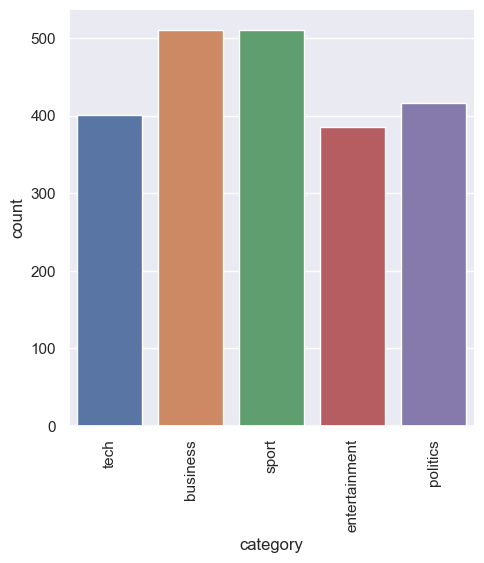

In [9]:
sns.set(font_scale=1)
g = sns.catplot(
            data = df,
            x = "category", 
            kind = "count"
            )
g.set_xticklabels(rotation = 90)

## Word Cloud

Now, let's build a category-wise word cloud to demonstrate which are the most frequent terms for each of the categories. This will give us a brief idea if there are any frequent words that separate our data up to some extent.

In [10]:
df.category.unique()

array(['tech', 'business', 'sport', 'entertainment', 'politics'],
      dtype=object)

In [11]:
tech = ' '.join(list(df.text[df.category == 'tech']))
business = ' '.join(list(df.text[df.category == 'business']))
sport = ' '.join(list(df.text[df.category == 'sport']))
entertainment = ' '.join(list(df.text[df.category == 'entertainment']))
politics = ' '.join(list(df.text[df.category == 'politics']))

### Stopwords

* When it comes to NLP, getting rid of stopwords is one of the most important steps. It ensures we get rid of the most frequent but usually useless words, e.g. "the", "a", "an", etc. to eliminate any bias they might cause.
* We have many methods to eliminate stop words - many NLP libraries like sklearn have their own stop words but it is usually considered a good idea to use stop words from the NLTK library. We shall do the same.

In [12]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

### Word Cloud by Category

Now that we have our stop words in a list, we can build our word clouds.

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def wordcloud(text, title):
    # Create the word cloud
    wordcloud = WordCloud(
        width=1600,
        height=1000,
        background_color="black",  # Set a clean background color
        colormap="coolwarm",       # Use a visually appealing color map
        stopwords=stop_words,      # Include the stopwords list
        max_words=200,             # Limit the number of words
        min_font_size=10           # Set the minimum font size
    ).generate(text)
    
    # Plot the word cloud
    plt.figure(figsize=(16, 10))  # Adjust figure size
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(f"Word Cloud for {title} Articles\n", fontsize=20)  # Add a title
    plt.axis("off")  # Remove axes
    plt.tight_layout(pad=0)  # Optimize layout
    plt.show()


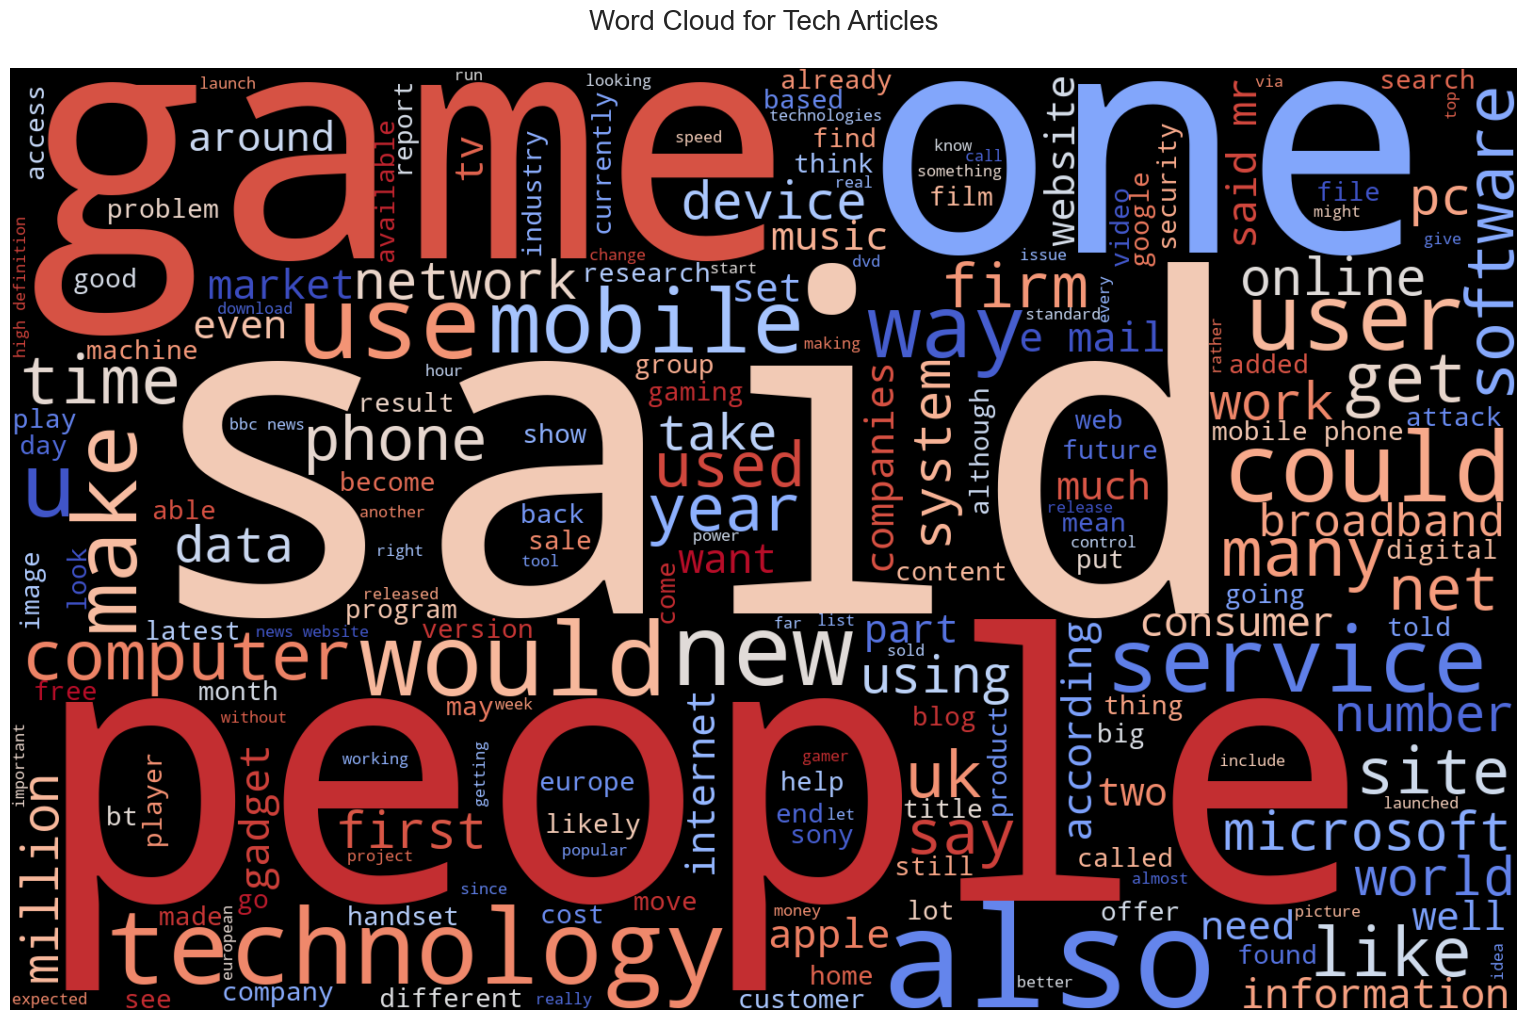

In [14]:
 wordcloud(tech, "Tech")

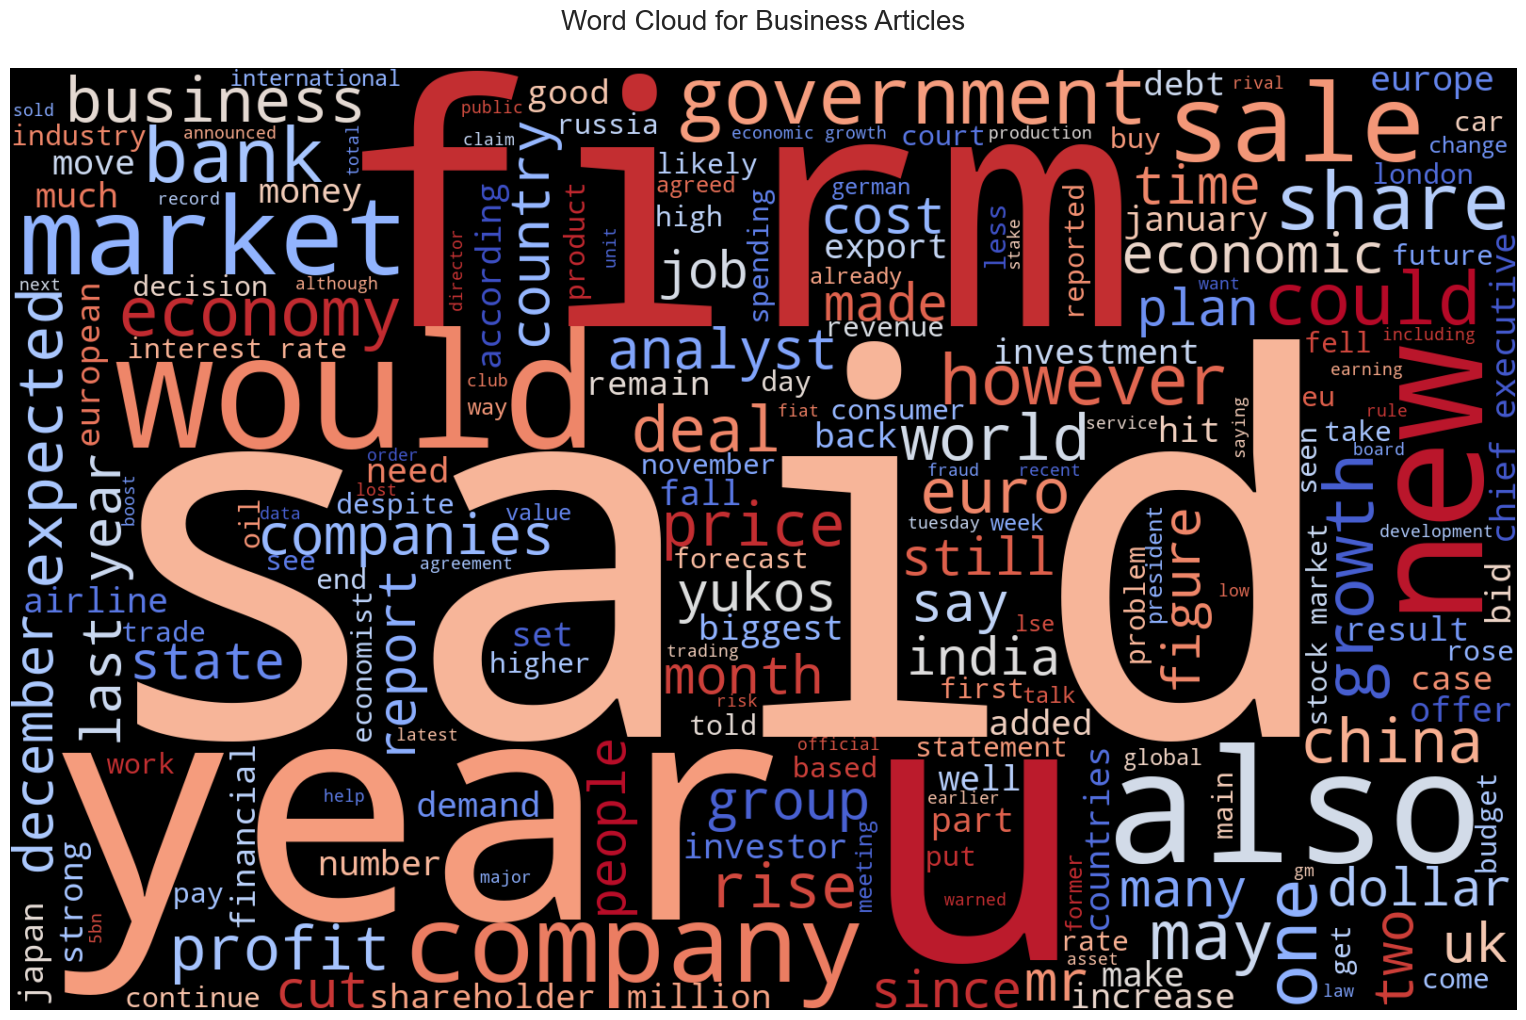

In [15]:
wordcloud(business, "Business")

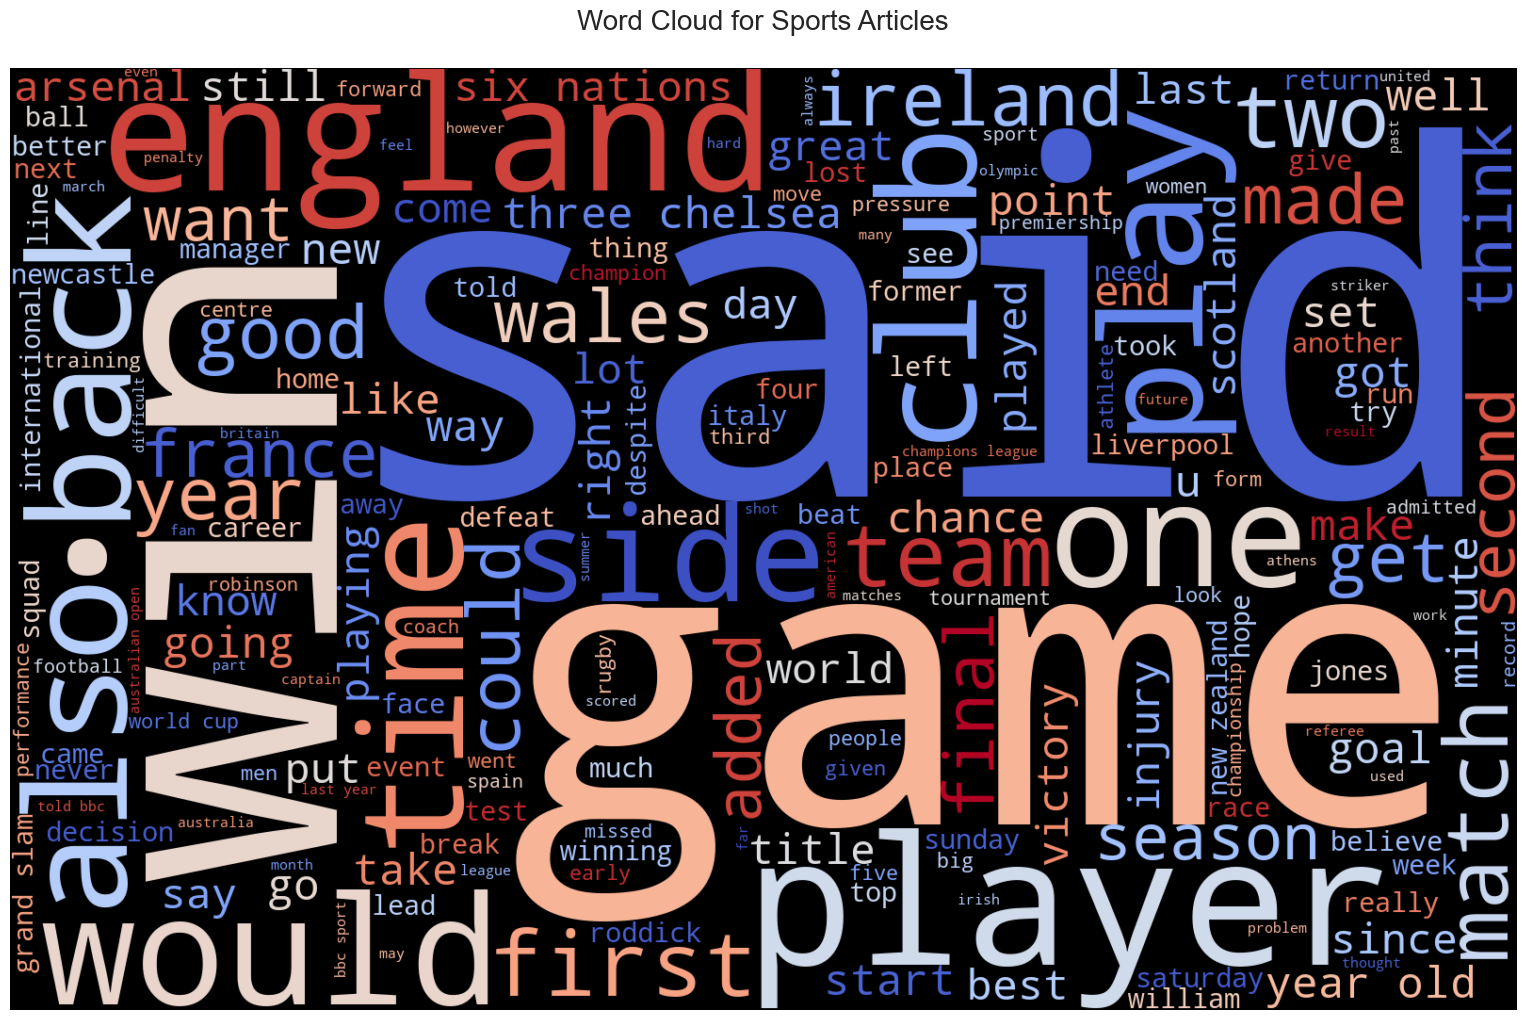

In [16]:
wordcloud(sport, "Sports")

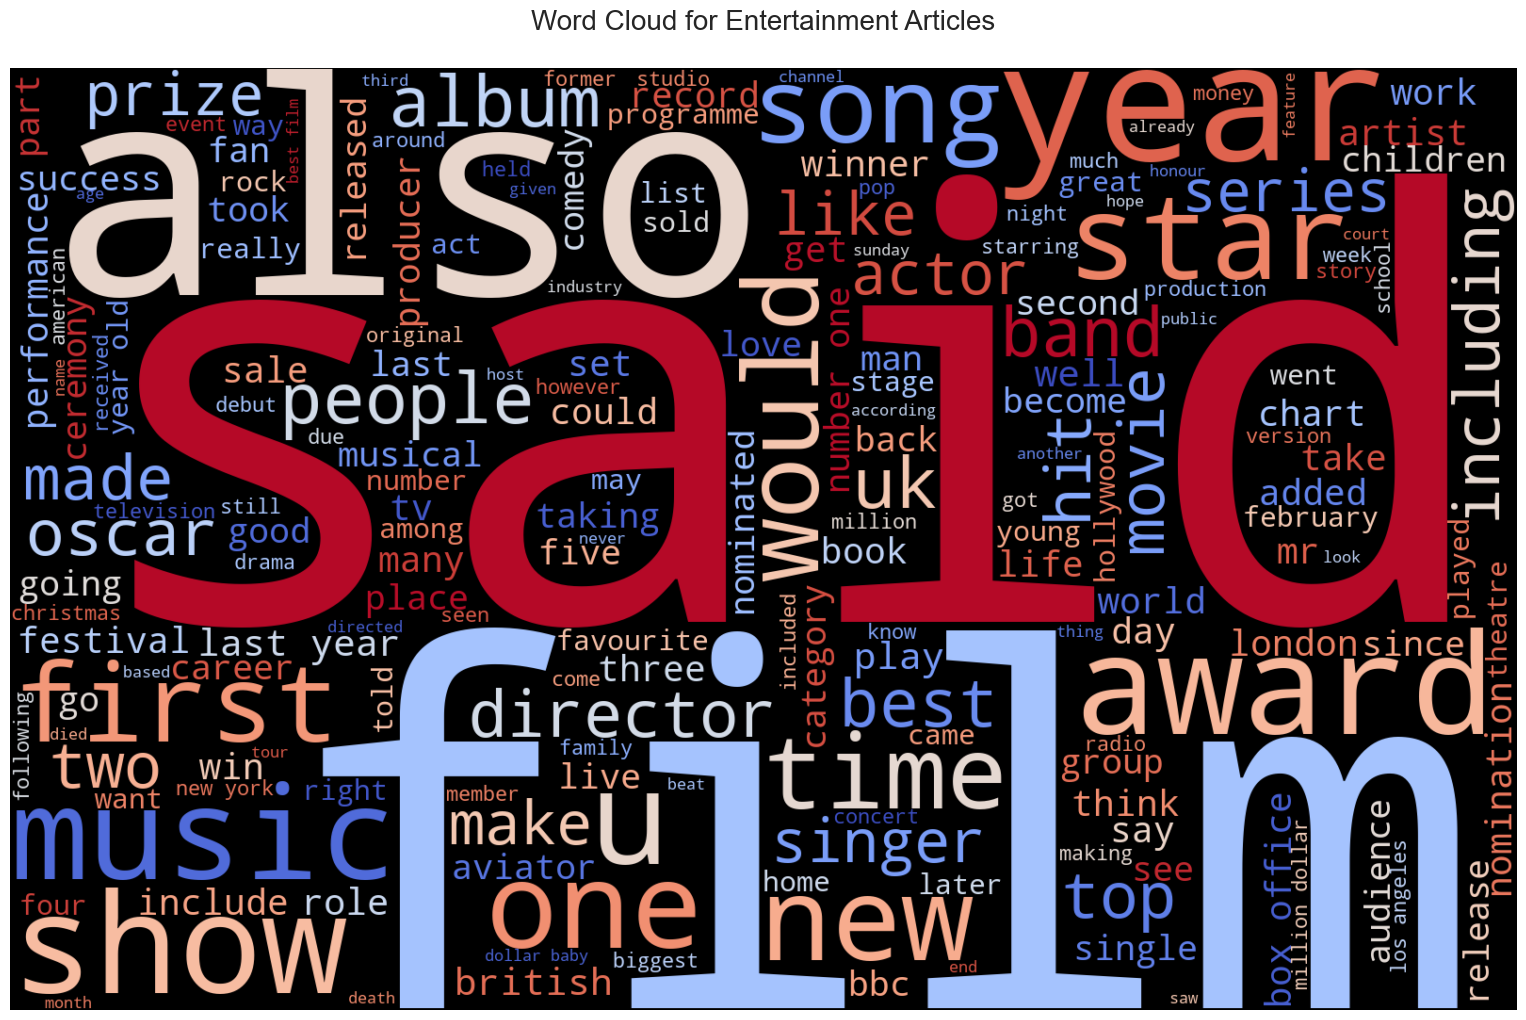

In [17]:
wordcloud(entertainment, "Entertainment")

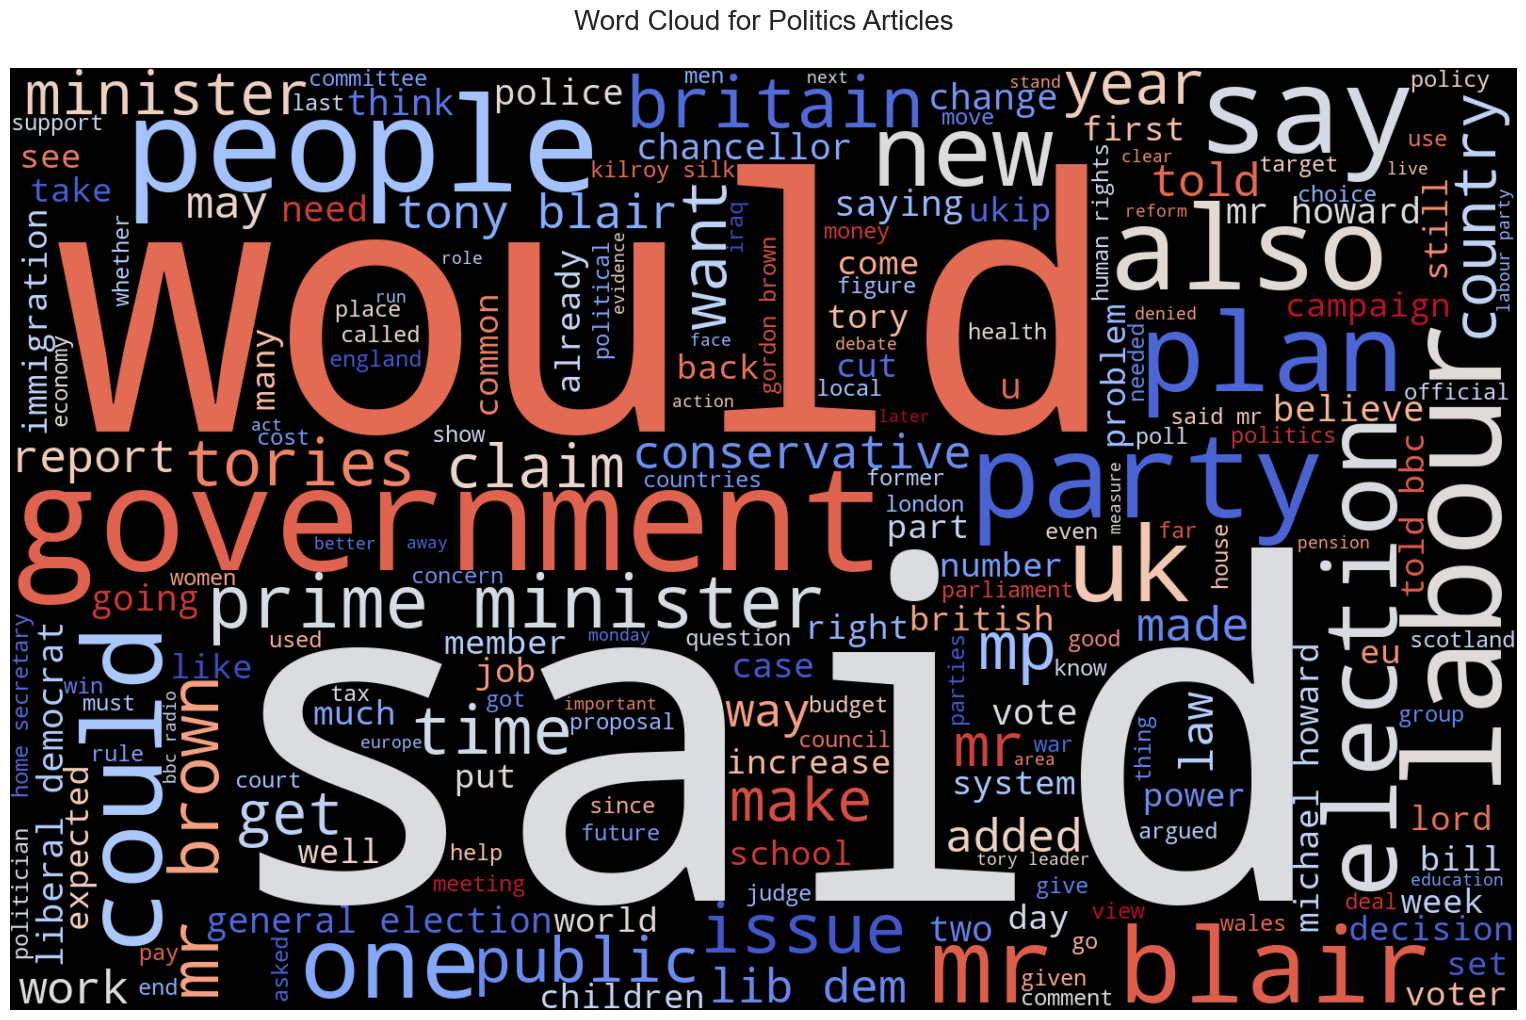

In [18]:
wordcloud(politics, "Politics")

From all of the above word clouds, we make the following observations - 
* The word **"said"** is very frequent in each of the articles In fact it is most frequent in almost every category of article. 
* For **tech** related articles, the words like ***people, technology, computer, software*** are frequent.
* For **business** related articles, the words like ***market, growth, company, firm*** are frequent.
* For **sport** related articles, the words like ***game, match, player, team, win*** are frequent.
* For **entertainment** related articles, the words like ***film, show, music, award, band*** are frequent.
* For **politics** related articles, the words like ***people, plan, labour, government*** are frequent.

## Feature Engineering
* When it comes to text data and text analytics in general, feature engineering is converting text data into features which can be used by algorithms i.e. converting text into meaningful numbers. 
* There are many methods to achieve that viz. Tokenization, Vectorization, etc. 
* We will make use of TF-IDF (Term Frequency, Inverse Document Frequency) vectorization to generate features out of our data i.e. the complaints.
* tf-idf vectorization is a technique in which each term in a document and hence the corpus is assigned a weight based on it's frequency. It has two terms.
    1. Term Frequency - This measures the term frequency for each document. 
        > *TF = (number of times term **e** appears in the document) / (total number of words in the document)*
        
    2. Inverse Document Frequency - This measures how important a term is w.r.t. the entire corpus. TF considers all terms equal hence terms which are more frequent like "is", "was", etc. will have a higher TF than more important, but rarer, words like "hazardous", "experiment", etc. IDF scales such rare words up and scales the more frequent words down so as to balance them both.
        > *IDF = ln(number of total documents / number of documents having the term **e**)*
        
    * We then calculate the TF-IDF by simply multiplying both the terms above - 
        > *TF-IDF = TF* x *IDF*

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
tf_idf = TfidfVectorizer(
    ngram_range=(1, 1), 
    stop_words=stop_words, 
    max_features=100
)

features = tf_idf.fit_transform(df.text).toarray()
features.shape

(2225, 100)

* The number of features generated using tf-idf without using the ***max_features*** argument are almost 370,000 which seems like an overkill for such a small dataset. 
* We will instead use the feature available in the tf-idf transformer to select the top *n* number of features instead.
* We will hence select the top 100 features.

In [21]:
features[:5, :5]

array([[0.04134567, 0.        , 0.        , 0.03853465, 0.04563396],
       [0.09410167, 0.        , 0.        , 0.        , 0.10386171],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.29001874],
       [0.        , 0.        , 0.        , 0.        , 0.        ]])

In [22]:
from sklearn.feature_selection import chi2
N = 2
labels = df.category_id
for category, category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == category_id)
    indices = np.argsort(features_chi2[0])  # Sort by chi2 scores
    
    # Get the sorted feature names (unigrams only)
    feature_names = np.array(tf_idf.get_feature_names_out())[indices]
    
    # Only work with unigrams (no need to separate bigrams)
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    
    # Print most correlated unigrams
    print("# '{}':".format(category))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))


# 'business':
  . Most correlated unigrams:
. company
. market
# 'entertainment':
  . Most correlated unigrams:
. best
. film
# 'politics':
  . Most correlated unigrams:
. blair
. labour
# 'sport':
  . Most correlated unigrams:
. england
. win
# 'tech':
  . Most correlated unigrams:
. mobile
. technology


> * Going through the features above, we can see that almost all of them make a lot of sense. 
> * Also, no mentions of the word **"said"** as discussed above.

# Model Selection

We will use the following algorithms to predict the categories and then compare them to select the most suitable one - 

1. Logistic Regression
2. Naive-Bayes Classifier
3. Random Forest

## Train-Test Split

We will use a 70-30 train-test split.

In [23]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df['text'], df['category'], train_size = 0.7, random_state = 1)
print("Train Size =", x_train.shape,
      "\nTest Size = ", x_test.shape)

Train Size = (1557,) 
Test Size =  (668,)


## Feature Generation

* For the categories, we will make use of label encoder module to convert them into usable feature.
* We will make use of tf-idf vectorization to generate a sparse matrix out of our text data in order for the algorithms to process it.

In [24]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)

In [25]:
# already imported the tf-idf vectorizer
tf_idf.fit(x_train)

x_train = tf_idf.fit_transform(x_train)
x_test = tf_idf.fit_transform(x_test)

print("Train Size =", x_train.shape,
      "\nTest Size = ", x_test.shape)

Train Size = (1557, 100) 
Test Size =  (668, 100)


## 3.3 Applying Algorithms

* Now that we have our data in order, let's start applying some ML algorithms on it and see how they perform. 
* Since we are not dealing with traditional datasets where the features are comprehensible, here we will not concern ourselves with detailed output from the algorithms (p-values, R-squared, etc.) but simply test their performance and test for it's robustness using cross-validation.

### 3.3.1 Summarizing Model Performance

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Define models
naive = MultinomialNB()
logreg = LogisticRegression(random_state=1)
rf = RandomForestClassifier(n_estimators=250, random_state=1)

# Function to perform cross-validation and return results
def model_performance(estimator):
    return cross_val_score(estimator, X=x_train, y=y_train, cv=5)

# List of models
models = [naive, logreg, rf]
model_names = ["MultinomialNB", "LogisticRegression", "RandomForestClassifier"]

# Initialize an empty DataFrame for storing results
cv_result = pd.DataFrame()

# Iterate over the models and get cross-validation scores
for model, name in zip(models, model_names):
    accuracy = model_performance(model)
    temp_df = pd.DataFrame({
        "Model": [name] * 5,
        "Fold": [1, 2, 3, 4, 5],
        "Accuracy": accuracy
    })
    cv_result = pd.concat([cv_result, temp_df], ignore_index=True)

cv_result


Model  Fold  Accuracy
0            MultinomialNB     1  0.855769
1            MultinomialNB     2  0.855769
2            MultinomialNB     3  0.868167
3            MultinomialNB     4  0.897106
4            MultinomialNB     5  0.836013
5       LogisticRegression     1  0.868590
6       LogisticRegression     2  0.849359
7       LogisticRegression     3  0.884244
8       LogisticRegression     4  0.884244
9       LogisticRegression     5  0.852090
10  RandomForestClassifier     1  0.878205
11  RandomForestClassifier     2  0.884615
12  RandomForestClassifier     3  0.871383
13  RandomForestClassifier     4  0.897106
14  RandomForestClassifier     5  0.864952

As can be seen, the accuracy scores have been pretty consistent across all folds for all three of our algorithms. Let's calculate the mean accuracy for each model and chse the best one to make some predictions.

### 3.3.2 Model Selection

In [27]:
cv_result.groupby("Model").Accuracy.mean().sort_values(ascending = False)

Model
RandomForestClassifier    0.879252
LogisticRegression        0.867705
MultinomialNB             0.862565
Name: Accuracy, dtype: float64

As we can see, Random Forest seems to be performing the best out of the three. Logistic Regression and Multinomial Naive-Bayes are almost just as good as Random Forest as they only fall short by 1%. We will now move ahead with Random Forest to make some predictions and see the confusion matrix as well.

### 3.3.3 Predictions

In [28]:
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)

pred_df = pd.DataFrame()
pred_df["Actual"] = y_test
pred_df["Predicted"] = predictions
pred_df.head(10)

Actual  Predicted
0       3          2
1       2          2
2       3          3
3       0          0
4       4          3
5       1          1
6       0          2
7       3          3
8       1          1
9       4          4

### 3.3.4 Confusion Matrix

In [29]:
!pip install pandas_ml

In [30]:
from sklearn.metrics import confusion_matrix

# Assuming y_test and predictions are already defined
cm = confusion_matrix(y_test, predictions)
print(cm)


[[115   4  27   8  14]
 [  4  94   0   8   2]
 [ 11   0  96   7   5]
 [  3   7   2 137   5]
 [  5   3   6   4 101]]


In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.68      0.75       168
           1       0.87      0.87      0.87       108
           2       0.73      0.81      0.77       119
           3       0.84      0.89      0.86       154
           4       0.80      0.85      0.82       119

    accuracy                           0.81       668
   macro avg       0.81      0.82      0.81       668
weighted avg       0.82      0.81      0.81       668



In [34]:
naive.fit(x_train, y_train)
predictions = naive.predict(x_test)

pred_df = pd.DataFrame()
pred_df["Actual"] = y_test
pred_df["Predicted"] = predictions
pred_df.head(10)

Actual  Predicted
0       3          4
1       2          2
2       3          3
3       0          0
4       4          3
5       1          1
6       0          0
7       3          3
8       1          4
9       4          4

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.77      0.82      0.79       168
           1       0.90      0.70      0.79       108
           2       0.70      0.75      0.72       119
           3       0.84      0.84      0.84       154
           4       0.73      0.76      0.74       119

    accuracy                           0.78       668
   macro avg       0.79      0.77      0.78       668
weighted avg       0.79      0.78      0.78       668



In [36]:
logreg.fit(x_train, y_train)
predictions = logreg.predict(x_test)

pred_df = pd.DataFrame()
pred_df["Actual"] = y_test
pred_df["Predicted"] = predictions
pred_df.head(10)

Actual  Predicted
0       3          2
1       2          2
2       3          3
3       0          0
4       4          3
5       1          1
6       0          0
7       3          3
8       1          1
9       4          4

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.73      0.76       168
           1       0.87      0.79      0.83       108
           2       0.71      0.75      0.73       119
           3       0.80      0.86      0.83       154
           4       0.75      0.77      0.76       119

    accuracy                           0.78       668
   macro avg       0.78      0.78      0.78       668
weighted avg       0.78      0.78      0.78       668

